In [1]:
import pandas as pd

file_path = 'C:\\Users\\hp\\Documents\\Crimes_-_2001_to_Present\\Crimes_-_2001_to_Present.csv'
df = pd.read_csv(file_path)

In [2]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [3]:
df.isna().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     13087
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614846
Community Area          613470
FBI Code                     0
X Coordinate             88958
Y Coordinate             88958
Year                         0
Updated On                   0
Latitude                 88958
Longitude                88958
Location                 88958
dtype: int64

In [4]:
# Drop rows with missing coordinates
clean_data = df.dropna(subset=['Latitude', 'Longitude','X Coordinate','Y Coordinate','Location'])

In [5]:
clean_data.isna().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      8348
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    605592
Community Area          604267
FBI Code                     0
X Coordinate                 0
Y Coordinate                 0
Year                         0
Updated On                   0
Latitude                     0
Longitude                    0
Location                     0
dtype: int64

In [8]:
# For `District`, `Ward`, and `Community Area`, we'll fill missing values with a placeholder (e.g., -1)
clean_data['District'] = clean_data['District'].fillna(-1)
clean_data['Ward'] = clean_data['Ward'].fillna(-1)
clean_data['Community Area'] = clean_data['Community Area'].fillna(-1)

C:\Users\hp\AppData\Local\Temp\ipykernel_14236\3399430550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['District'] = clean_data['District'].fillna(-1)
C:\Users\hp\AppData\Local\Temp\ipykernel_14236\3399430550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Ward'] = clean_data['Ward'].fillna(-1)
C:\Users\hp\AppData\Local\Temp\ipykernel_14236\3399430550.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [9]:
# Fill missing `Location Description` with 'UNKNOWN'
clean_data['Location Description'] = clean_data['Location Description'].fillna('UNKNOWN')

C:\Users\hp\AppData\Local\Temp\ipykernel_14236\3135593586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Location Description'] = clean_data['Location Description'].fillna('UNKNOWN')


In [10]:
clean_data.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [11]:
clean_data['Date'] = pd.to_datetime(clean_data['Date'])
clean_data['Year'] = clean_data['Date'].dt.year
clean_data['Month'] = clean_data['Date'].dt.month
clean_data['DayOfWeek'] = clean_data['Date'].dt.dayofweek
clean_data['Hour'] = clean_data['Date'].dt.hour

C:\Users\hp\AppData\Local\Temp\ipykernel_14236\3520083028.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  clean_data['Date'] = pd.to_datetime(clean_data['Date'])
C:\Users\hp\AppData\Local\Temp\ipykernel_14236\3520083028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Date'] = pd.to_datetime(clean_data['Date'])
C:\Users\hp\AppData\Local\Temp\ipykernel_14236\3520083028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [14]:
clean_data['Day'] = clean_data['Date'].dt.day

C:\Users\hp\AppData\Local\Temp\ipykernel_14236\4257362172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Day'] = clean_data['Date'].dt.day


In [15]:
clean_data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,DayOfWeek,Hour,Day
1,25953,JE240540,2021-05-24 15:06:00,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)",5,0,15,24
2,26038,JE279849,2021-06-26 09:24:00,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)",6,5,9,26
3,13279676,JG507211,2023-11-09 07:30:00,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)",11,3,7,9
4,13274752,JG501049,2023-11-12 07:59:00,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)",11,6,7,12
6,13203321,JG415333,2023-09-06 17:00:00,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)",9,2,17,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077146,13047495,JG229914,2023-04-18 08:00:00,003XX N JEFFERSON ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,1902384.0,2023,08/19/2023 03:40:26 PM,41.887589,-87.642827,"(41.887589411, -87.642826595)",4,1,8,18
8077147,13168300,JG373901,2023-08-07 18:00:00,0000X W 95TH ST,031A,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,...,1841973.0,2023,08/19/2023 03:40:26 PM,41.721698,-87.625345,"(41.72169837, -87.625345212)",8,0,18,7
8077148,13114024,JG309527,2023-06-20 19:00:00,031XX S AVERS AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,1883542.0,2023,08/19/2023 03:40:26 PM,41.836324,-87.720674,"(41.836323827, -87.720674149)",6,1,19,20
8077149,13188860,JG398340,2023-08-26 00:00:00,078XX S SOUTH SHORE DR,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,1853426.0,2023,09/02/2023 03:41:45 PM,41.752631,-87.548737,"(41.752631346, -87.548737069)",8,5,0,26


In [13]:
clean_data.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
DayOfWeek               0
Hour                    0
dtype: int64

In [16]:
clean_data.to_csv("Chicago crime.csv", index= False)

In [ ]:
import pandas as pd
data = pd.read_csv('C:\\Users\\hp\\Chicago crime.csv')

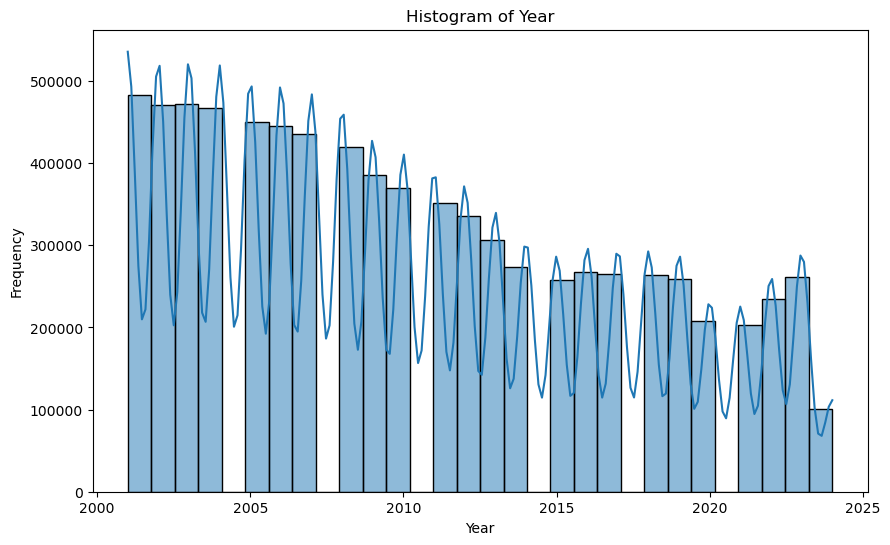

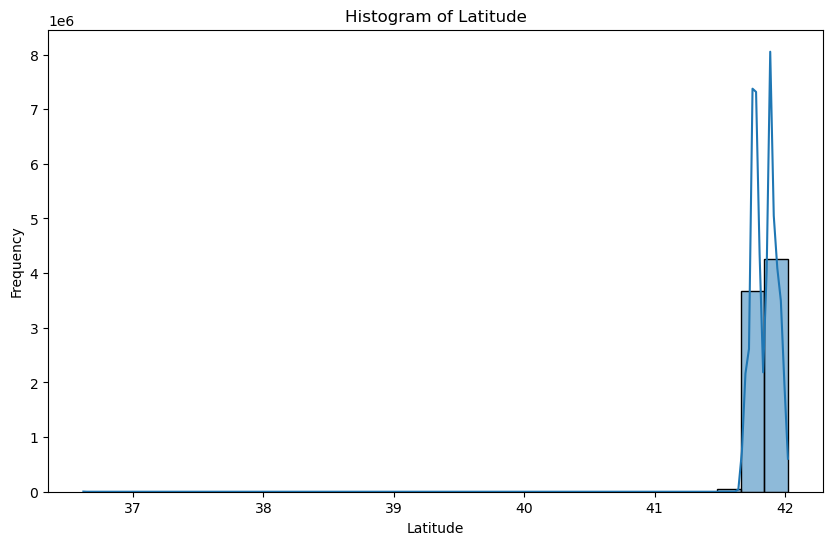

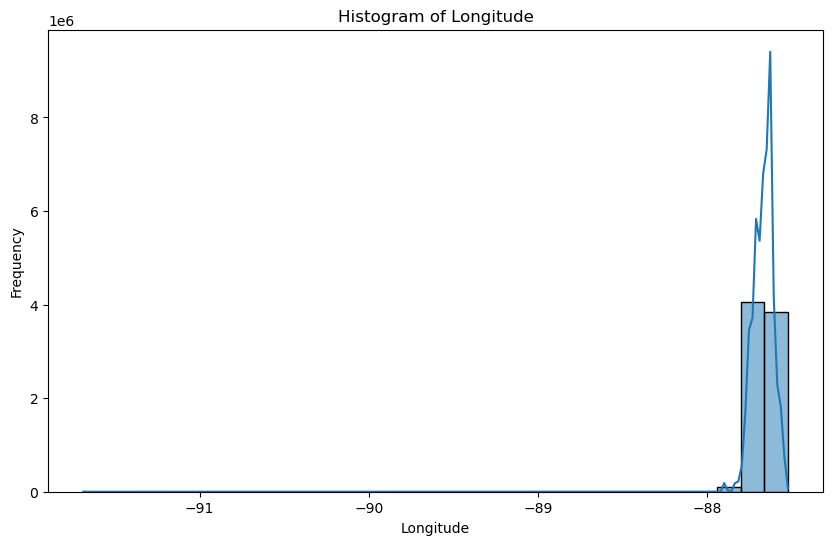

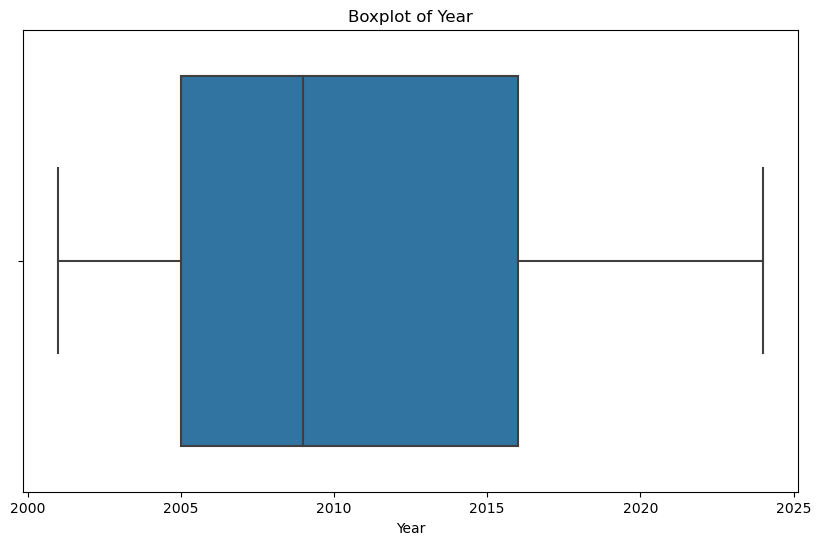

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def descriptive_statistics(data):
    """Generate descriptive statistics for the dataset."""
    return data.describe()

def plot_histogram(data, column, bins=30):
    """Plot a histogram for the specified column."""
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=bins, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

def plot_boxplot(data, column):
    """Plot a boxplot for the specified column."""
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

# Generate descriptive statistics
stats = descriptive_statistics(data)

# Plot histograms and boxplots for key numerical columns
plot_histogram(data, 'Year')
plot_histogram(data, 'Latitude')
plot_histogram(data, 'Longitude')
plot_boxplot(data, 'Year')


# Temporal Analysis

In [23]:
def plot_crime_trends(data):
    """Plot the number of crimes over years, months, and days."""
    plt.figure(figsize=(14, 6))
    
    # Crimes per year
    plt.subplot(1, 3, 1)
    crimes_per_year = data['Year'].value_counts().sort_index()
    crimes_per_year.plot(kind='bar')
    plt.title('Crimes per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Crimes')
    
    # Crimes per month
    plt.subplot(1, 3, 2)
    crimes_per_month = data['Month'].value_counts().sort_index()
    crimes_per_month.plot(kind='bar')
    plt.title('Crimes per Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Crimes')
    
    # Crimes per day
    plt.subplot(1, 3, 3)
    crimes_per_day = data['DayOfWeek'].value_counts().sort_index()
    crimes_per_day.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    crimes_per_day.plot(kind='bar')
    plt.title('Crimes per Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Crimes')
    
    plt.tight_layout()
    plt.show()

def plot_peak_hours(data):
    """Plot the number of crimes for each hour of the day."""
    plt.figure(figsize=(10, 6))
    crimes_per_hour = data['Hour'].value_counts().sort_index()
    crimes_per_hour.plot(kind='bar')
    plt.title('Crimes per Hour of the Day')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Crimes')
    plt.show()


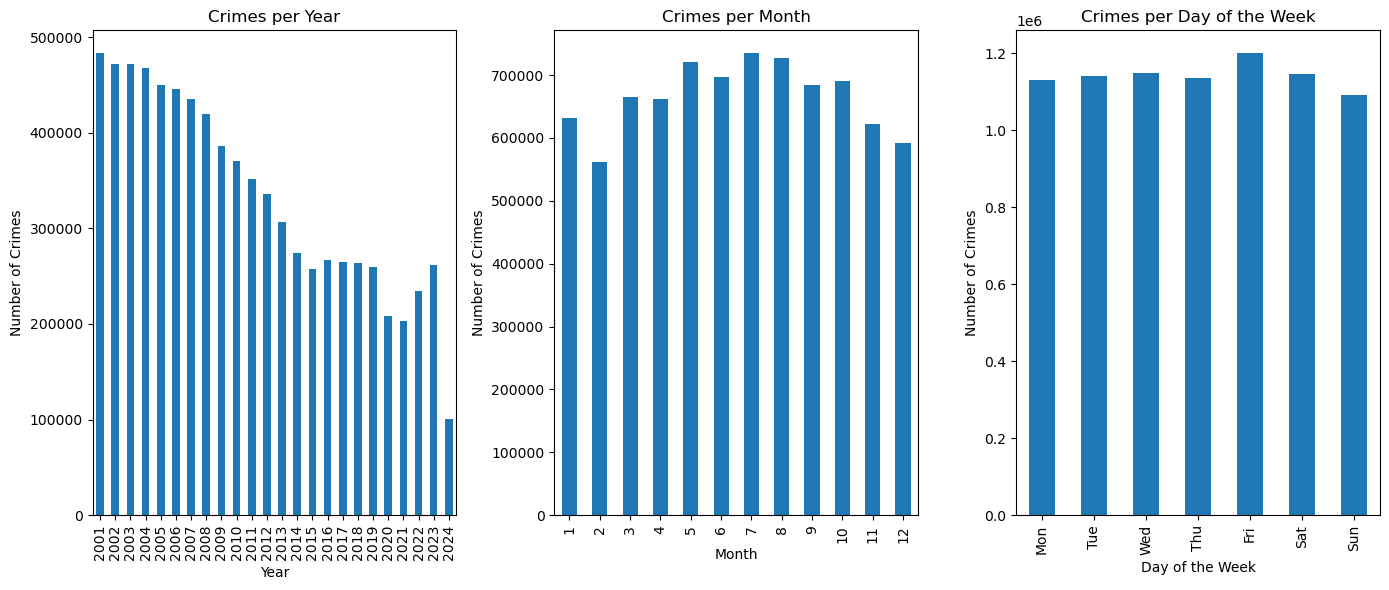

In [24]:
# Plot crime trends over time
plot_crime_trends(data)

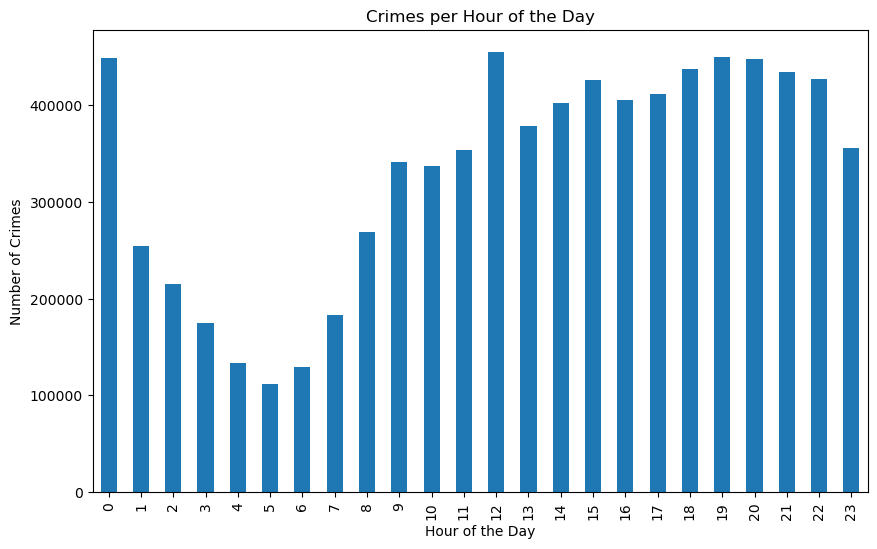

In [25]:
# Plot peak crime hours
plot_peak_hours(data)

In [26]:
!pip install folium

In [3]:
import folium
from folium.plugins import HeatMap

def create_heatmap(data, lat_col='Latitude', lon_col='Longitude', zoom_start=11):
    """Create a heatmap of crime locations."""
    # Filter out rows with missing coordinates
    data = data[(data[lat_col] != 0) & (data[lon_col] != 0)]
    
    # Create a base map
    base_map = folium.Map(location=[data[lat_col].mean(), data[lon_col].mean()], zoom_start=zoom_start)
    
    # Add heatmap
    heat_data = [[row[lat_col], row[lon_col]] for index, row in data.iterrows()]
    HeatMap(heat_data).add_to(base_map)
    
    return base_map

In [4]:
# Create and display the heatmap
crime_heatmap = create_heatmap(data)
crime_heatmap.save('crime_heatmap.html')

# District/Ward Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_district_ward_analysis(data, group_by_col, title):
    """Plot the number of crimes by district or ward."""
    plt.figure(figsize=(12, 6))
    crime_counts = data[group_by_col].value_counts().sort_index()
    crime_counts.plot(kind='bar')
    plt.title(f'Number of Crimes by {title}')
    plt.xlabel(title)
    plt.ylabel('Number of Crimes')
    plt.show()

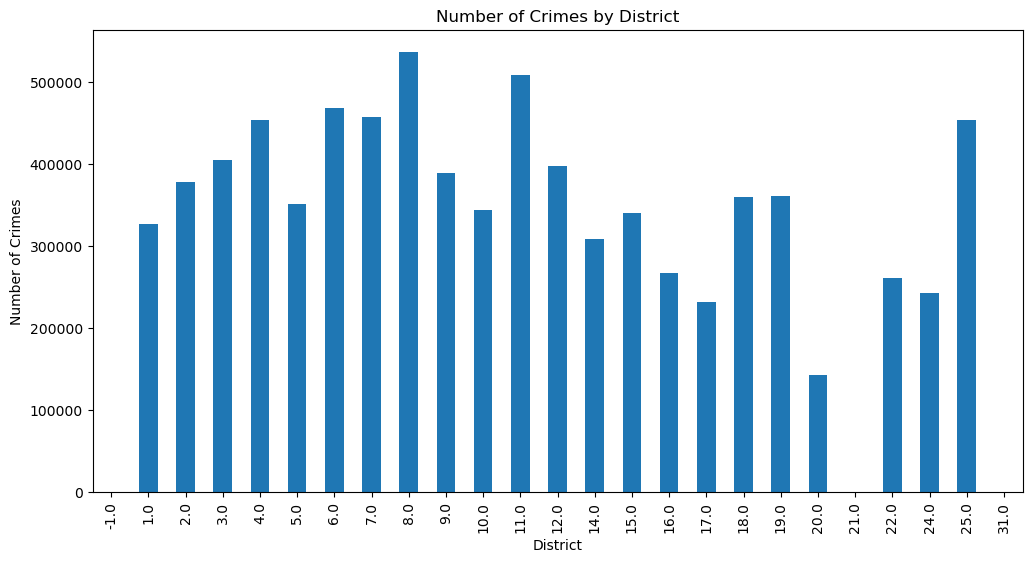

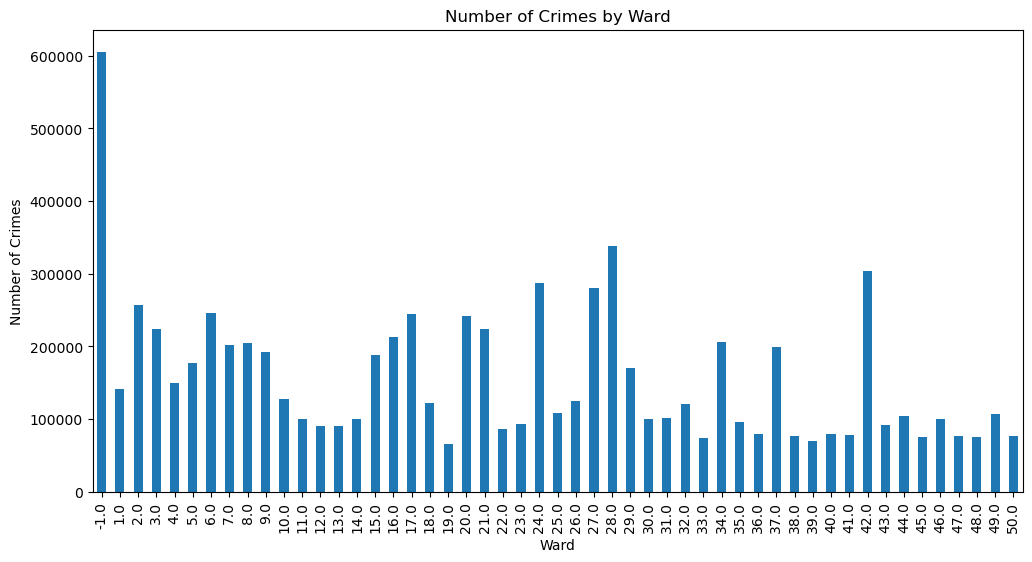

In [9]:
# Plot the number of crimes by district
plot_district_ward_analysis(data, 'District', 'District')

# Plot the number of crimes by ward
plot_district_ward_analysis(data, 'Ward', 'Ward')

In [10]:
def plot_crime_type_distribution(data, column='Primary Type', top_n=10):
    """Plot the distribution of the top N crime types."""
    plt.figure(figsize=(12, 6))
    crime_type_counts = data[column].value_counts().head(top_n)
    crime_type_counts.plot(kind='bar')
    plt.title(f'Top {top_n} Crime Types')
    plt.xlabel('Crime Type')
    plt.ylabel('Number of Crimes')
    plt.xticks(rotation=45)
    plt.show()

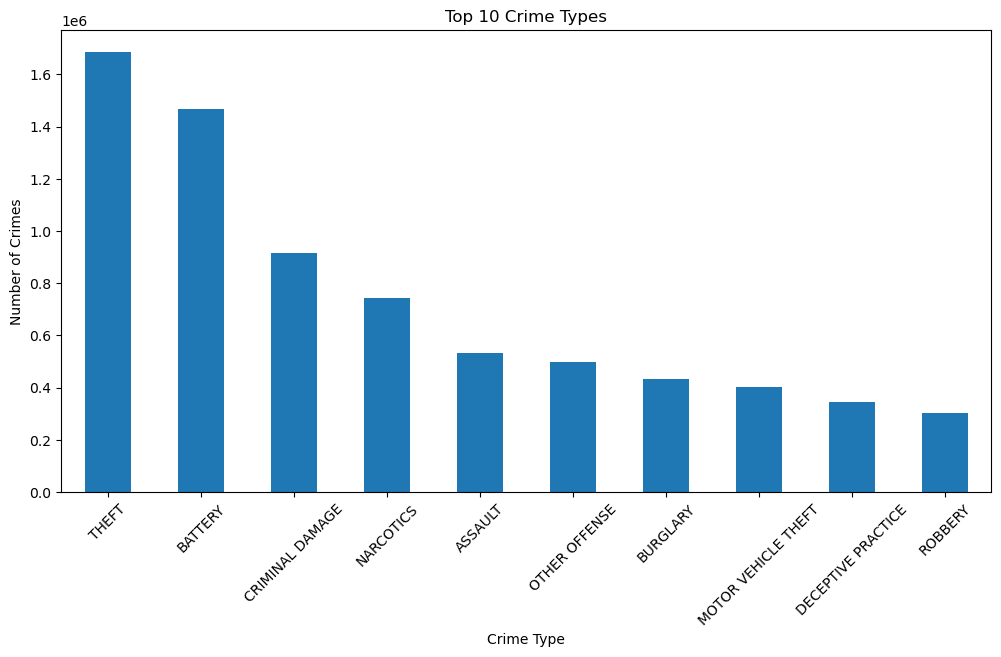

In [11]:
# Plot the distribution of crime types
plot_crime_type_distribution(data)

In [12]:
# Define lists of severe and less severe crimes
severe_crimes = ['HOMICIDE', 'ASSAULT', 'ROBBERY', 'CRIM SEXUAL ASSAULT', 'BATTERY']
less_severe_crimes = ['THEFT', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BURGLARY', 'MOTOR VEHICLE THEFT']

def plot_severity_analysis(data, severe_crimes, less_severe_crimes):
    """Plot the distribution of severe vs. less severe crimes."""
    data['Severity'] = data['Primary Type'].apply(
        lambda x: 'Severe' if x in severe_crimes else ('Less Severe' if x in less_severe_crimes else 'Other')
    )
    
    plt.figure(figsize=(10, 6))
    severity_counts = data['Severity'].value_counts()
    severity_counts.plot(kind='bar')
    plt.title('Crime Severity Distribution')
    plt.xlabel('Severity')
    plt.ylabel('Number of Crimes')
    plt.show()

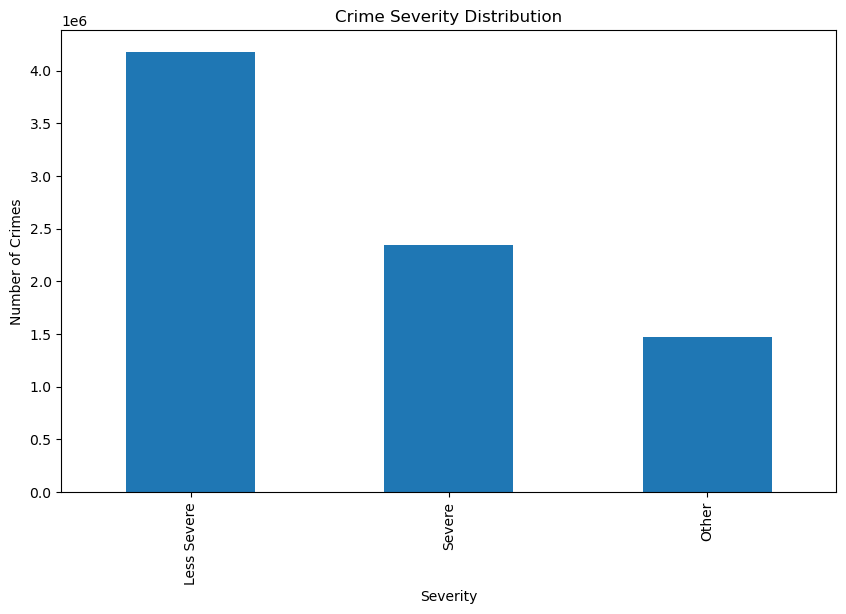

In [13]:
# Plot the severity analysis
plot_severity_analysis(data, severe_crimes, less_severe_crimes)

In [14]:
# Arrest and Domestic Incident Analysis

def plot_arrest_rates(data):
    """Plot the percentage of crimes resulting in arrests."""
    arrest_counts = data['Arrest'].value_counts(normalize=True) * 100
    arrest_counts.plot(kind='bar')
    plt.title('Arrest Rates')
    plt.xlabel('Arrest Made')
    plt.ylabel('Percentage of Crimes')
    plt.show()

def plot_domestic_incidents(data):
    """Plot the percentage of domestic vs. non-domestic incidents."""
    domestic_counts = data['Domestic'].value_counts(normalize=True) * 100
    domestic_counts.plot(kind='bar')
    plt.title('Domestic vs. Non-Domestic Crimes')
    plt.xlabel('Domestic Incident')
    plt.ylabel('Percentage of Crimes')
    plt.show()

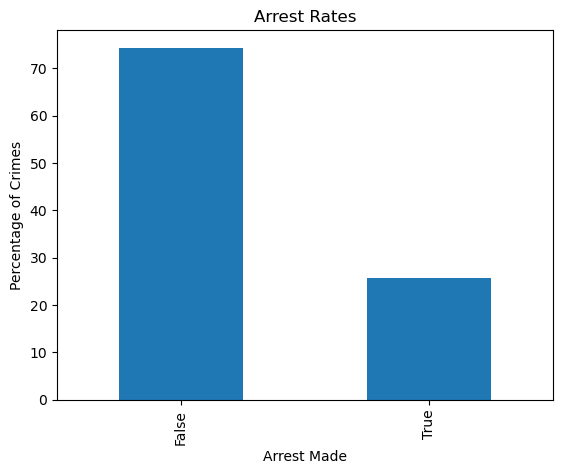

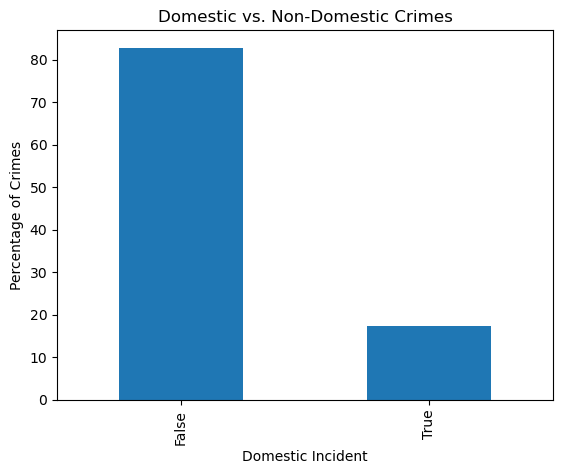

In [15]:
# Plot arrest rates
plot_arrest_rates(data)

# Plot domestic vs. non-domestic incidents
plot_domestic_incidents(data)

# Location-Specific Analysis

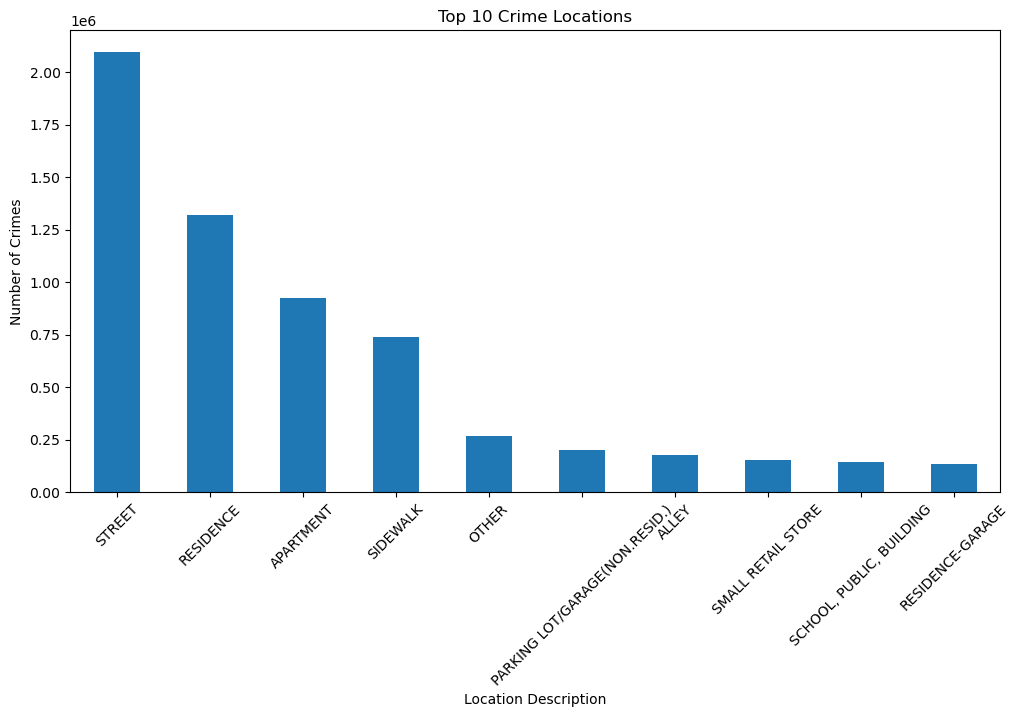

In [16]:
def plot_location_description_analysis(data, top_n=10):
    """Plot the most common locations for crimes."""
    plt.figure(figsize=(12, 6))
    location_counts = data['Location Description'].value_counts().head(top_n)
    location_counts.plot(kind='bar')
    plt.title(f'Top {top_n} Crime Locations')
    plt.xlabel('Location Description')
    plt.ylabel('Number of Crimes')
    plt.xticks(rotation=45)
    plt.show()

# Plot location description analysis
plot_location_description_analysis(data)

# Seasonal and Weather Impact

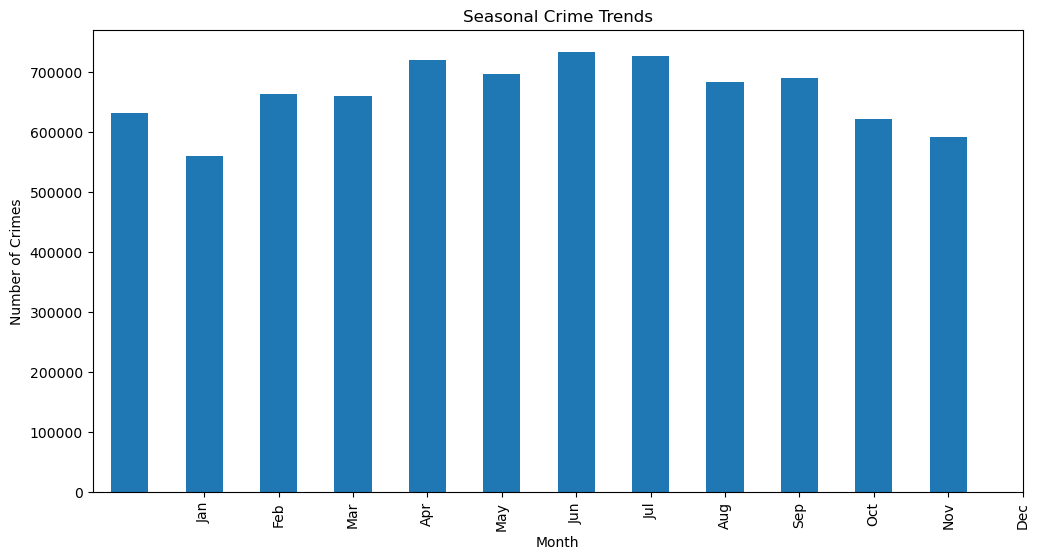

In [18]:
def plot_seasonal_trends(data):
    """Plot seasonal trends in crime occurrences."""
    data['Date'] = pd.to_datetime(data['Date'])
    data['Month'] = data['Date'].dt.month

    plt.figure(figsize=(12, 6))
    seasonal_counts = data['Month'].value_counts().sort_index()
    seasonal_counts.plot(kind='bar')
    plt.title('Seasonal Crime Trends')
    plt.xlabel('Month')
    plt.ylabel('Number of Crimes')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

# Plot seasonal trends
plot_seasonal_trends(data)

C:\Users\hp\AppData\Local\Temp\ipykernel_13276\2102019542.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(repeat_locations.index, rotation=90)


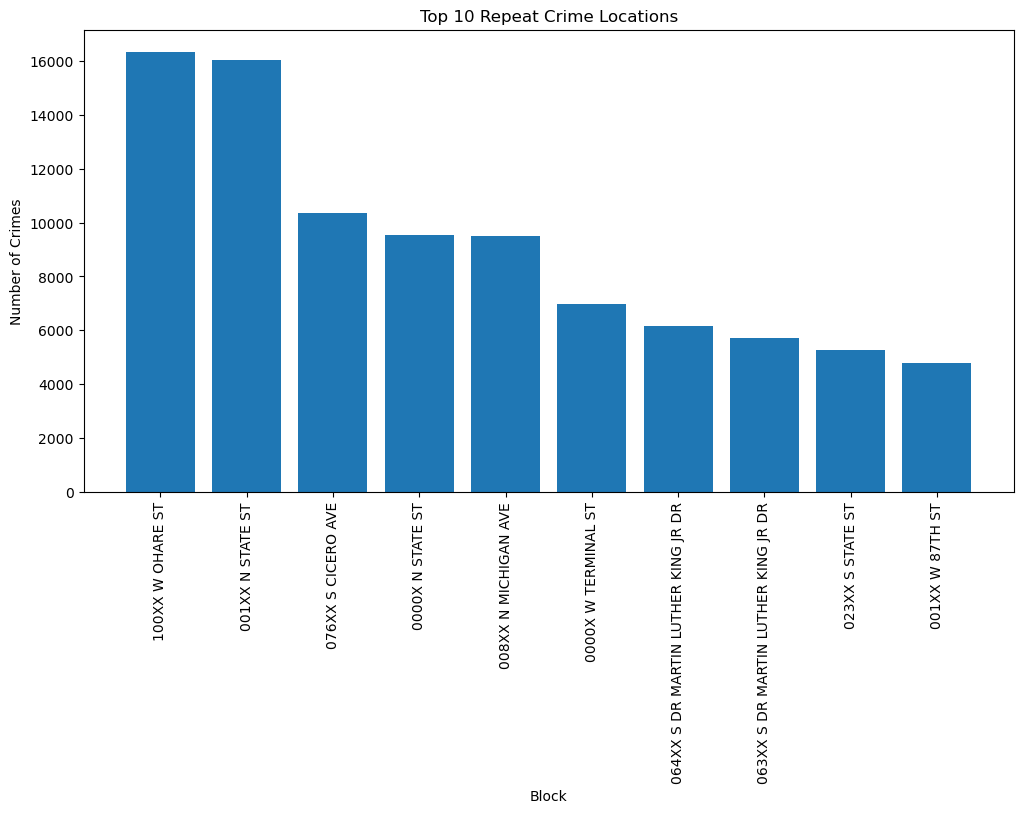

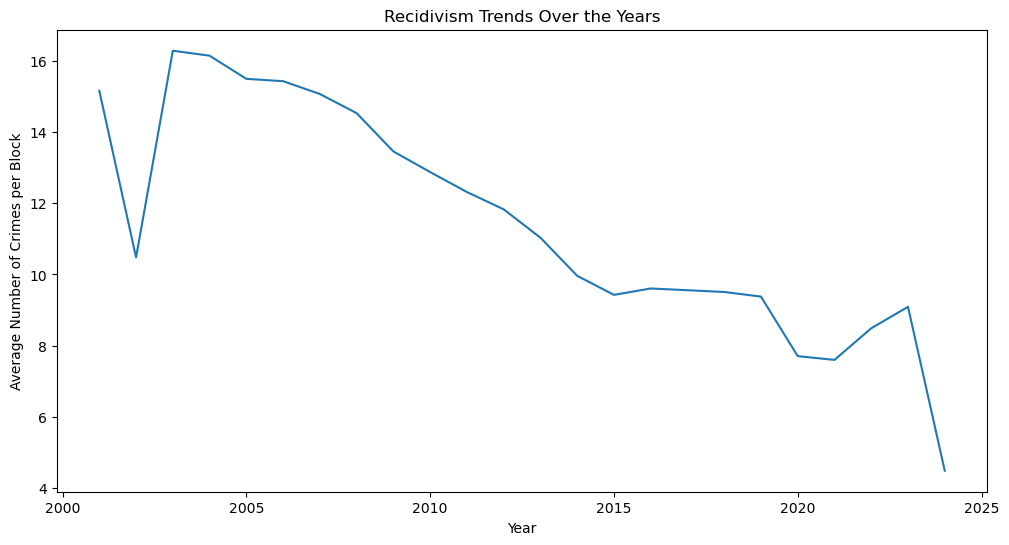

In [20]:
# Function to plot repeat crime locations
def plot_repeat_crime_locations(data):
    repeat_locations = data['Block'].value_counts().head(10)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(repeat_locations.index, repeat_locations.values)
    ax.set_title('Top 10 Repeat Crime Locations')
    ax.set_xlabel('Block')
    ax.set_ylabel('Number of Crimes')
    ax.set_xticklabels(repeat_locations.index, rotation=90)
    plt.show()

# Function to plot recidivism trends
def plot_recidivism_trends(data):
    fig, ax = plt.subplots(figsize=(12, 6))
    recidivism_trends = data.groupby(['Year', 'Block']).size().unstack().mean(axis=1)
    recidivism_trends.plot(ax=ax)
    ax.set_title('Recidivism Trends Over the Years')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Number of Crimes per Block')
    plt.show()

# Example usage in a Jupyter Notebook or Python script
plot_repeat_crime_locations(data)
plot_recidivism_trends(data)

In [2]:
# Feature Engineering for Predictive Modeling
from sklearn.preprocessing import LabelEncoder

def feature_engineering(data):
    le = LabelEncoder()
    data['Primary Type Encoded'] = le.fit_transform(data['Primary Type'])
    data['Location Description Encoded'] = le.fit_transform(data['Location Description'])
    return data

data = feature_engineering(data)

In [3]:
# Define features and target
features = ['Year', 'Month', 'DayOfWeek', 'Hour', 'Latitude', 'Longitude', 'Location Description Encoded', 'District', 'Ward', 'Community Area']
target = 'Primary Type Encoded'

X = data[features]
y = data[target]

In [4]:
y.value_counts()
#imbalance target

Primary Type Encoded
34    1685852
2     1467204
6      915655
19     741256
1      530901
26     497521
3      430903
18     401264
9      344971
31     302810
8      218467
35     115198
27      69386
24      53902
29      53047
32      30378
5       26007
14      18992
17      14977
11      14540
0       13741
12      13225
7        7795
16       7304
33       5250
15       4840
4        1286
23        830
28        203
21        176
25        147
13         94
20         38
30         23
22          9
10          1
Name: count, dtype: int64

In [9]:
from imblearn.over_sampling import RandomOverSampler

# Example: RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_new, y_new = ros.fit_resample(X, y)

MemoryError: Unable to allocate 4.52 GiB for an array with shape (60690672, 10) and data type float64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [26]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
def accuracy_checking(X_data, y_data, algorithm):
  #train test splitting
  X_train, X_test, y_train, y_test= train_test_split(X_data, y_data, test_size= 0.2, random_state=42)

  model= algorithm().fit(X_train, y_train)

  y_pred_train= model.predict(X_train)
  y_pred_test= model.predict(X_test)

  #checking the accuracy_score
  accuracy_train= accuracy_score(y_train, y_pred_train)
  accuracy_test= accuracy_score(y_test, y_pred_test)

  metrics={"Algorithm": algorithm.__name__,
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
  return metrics

In [ ]:
print(accuracy_checking(X,y,DecisionTreeClassifier))
print(accuracy_checking(X,y,RandomForestClassifier))
print(accuracy_checking(X,y,MultinomialNB))
print(accuracy_checking(X,y,KNeighborsClassifier))
print(accuracy_checking(X,y,SVC))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 0.9967937052092823, 'Accuracy_Test': 0.26048124764105035}
